<a href="https://githubtocolab.com/emiletimothy/Caltech-CS155-2023/blob/main/set2/set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the text files in.

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training1.txt', 'wine_training1.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training2.txt', 'wine_training2.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_validation.txt', 'wine_validation.txt')

('wine_validation.txt', <http.client.HTTPMessage at 0x7f0ed03b7e20>)

The following function may be useful for loading the necessary data.

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [ ]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    # return -1 * ((np.sum(np.log(1/ (1 + (np.exp(-1 * Y * np.dot(X, w))))))) / len(Y))
    return -1 * np.average(np.log(1 / (1 + np.exp(-1 * Y * np.dot(X, w)))))
def gradient(x, y, w, lamb, N):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to w. 
    '''
    return (-1 * x * y )/ (1 + np.exp(y * np.dot(w, x))) + (2 * lamb / N) * w
def SGD(X, Y, w_start, eta, N_epochs, lamb):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    N = len(X)
    w = np.array(w_start)
    for epoch in range(N_epochs):
      for idx in np.random.permutation(len(X)):
        w -= eta * gradient(X[idx], Y[idx], w, lamb, N)
    return w


In [ ]:
data1 = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training1.txt') 
X_train1 = data1[ : , 1:]
Y_train1 = data1[ : , 0]
#Normalize
x1_mean = np.mean(X_train1, axis=0)
x1_dev = np.std(X_train1, axis= 0)
X_train1 = np.insert((X_train1 - x1_mean) / x1_dev, 0, 1, axis=1)

data2 = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training2.txt')
X_train2 = data2[ : , 1:]
Y_train2 = data2[: , 0]
#Normalize
x2_mean = np.mean(X_train2, axis= 0)
x2_dev = np.std(X_train2, axis=0)
X_train2 = np.insert((X_train2 - x2_mean) / x2_dev, 0, 1, axis=1)

datav = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_validation.txt')
X_test = datav[ : , 1:]
Y_test = datav[: , 0]
#Normalize
X_test1 = np.insert((X_test - x1_mean) / x1_dev, 0, 1, axis=1)
X_test2 = np.insert((X_test - x2_mean) / x2_dev, 0, 1, axis=1)

In [ ]:
lamb = [0.00001 * (5 ** i) for i in range(0, 15)]
w_start = np.random.rand(14)/1000
N_epochs = 20000
eta = 5e-4

In [ ]:
w_train1 = [SGD(X_train1, Y_train1, w_start, eta, N_epochs, lam) for lam in lamb]
Ein_train1 = [loss(X_train1, Y_train1, weight) for weight in w_train1]
Eout_train1 = [loss(X_test1, Y_test, weight) for weight in w_train1]

In [ ]:
w_train2 = [SGD(X_train2, Y_train2, w_start, eta, N_epochs, lam) for lam in lamb]
Ein_train2 = [loss(X_train2, Y_train2, weight) for weight in w_train2]
Eout_train2 =[loss(X_test2, Y_test, weight) for weight in w_train2]

In [ ]:
w_train1_norm = []
for w in w_train1:
  w_train1_norm.append(np.sqrt(np.matmul(w.transpose(), w)))

w_train2_norm = []
for w in w_train2:
  w_train2_norm.append(np.sqrt(np.matmul(w.transpose(), w)))

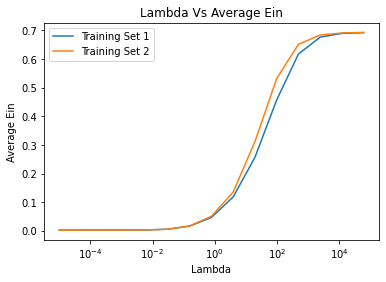

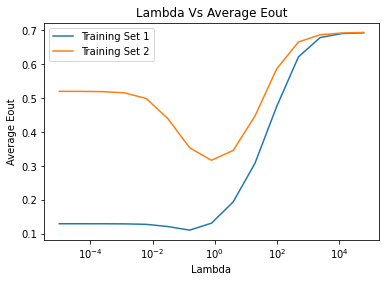

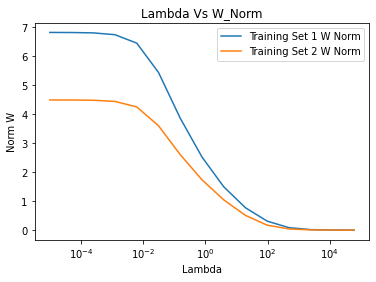

In [ ]:
def graph_em(X, Y, Y2, title, legend, x_axis, y_axis):
  plt.figure()
  plt.plot(X, Y)
  plt.plot(X, Y2)
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.legend(legend)
  plt.xscale('log')
  plt.show()

#Lambda Vs Ein
graph_em(lamb, Ein_train1, Ein_train2, "Lambda Vs Average Ein", ["Training Set 1", "Training Set 2"], "Lambda", "Average Ein")
#Lambda Vs Eout
graph_em(lamb, Eout_train1, Eout_train2, "Lambda Vs Average Eout", ["Training Set 1", "Training Set 2"], "Lambda", "Average Eout")
#Lambda Vs W_Norm
graph_em(lamb, w_train1_norm, w_train2_norm, "Lambda Vs W_Norm", ["Training Set 1 W Norm", "Training Set 2 W Norm"], "Lambda", "Norm W")